In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [30]:
base_path = os.getcwd()
print('base_path', base_path)

# Load the images
img1 = cv2.imread(f'{base_path}/images/img1.png')
img2 = cv2.imread(f'{base_path}/images/img2.png')
img3 = cv2.imread(f'{base_path}/images/img3.jpg')
img4 = cv2.imread(f'{base_path}/images/img4.jpg')
img5 = cv2.imread(f'{base_path}/images/img5.jpg')
image_list = [img1, img2, img3]

base_path /home/shosen/training/image-noice-show-remove


In [41]:
def remove_noise(img):
    """
    Removes noise from a given image using Non-Local Means Denoising.
    Parameters:
        img (numpy array): Input image in BGR format.
    Returns:
        numpy array: Image with noise removed.
    """
    # Step 1: Apply Non-Local Means Denoising to remove noise
    denoised_img = cv2.fastNlMeansDenoisingColored(img, None, h=30, templateWindowSize=7, searchWindowSize=21)
    return denoised_img

def enhance_image(image):
    # Apply sharpening
    sharpening_kernel = np.array([[0, -1, 0],
                                   [-1, 5, -1],
                                   [0, -1, 0]])
    sharpened = cv2.filter2D(image, -1, sharpening_kernel)
    
    # Convert to LAB color space for contrast enhancement
    lab = cv2.cvtColor(sharpened, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    
    # Apply CLAHE on the L channel
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced_l = clahe.apply(l)
    
    # Merge back and convert to BGR
    enhanced_lab = cv2.merge((enhanced_l, a, b))
    enhanced_image = cv2.cvtColor(enhanced_lab, cv2.COLOR_LAB2BGR)
    
    return enhanced_image

def remove_shadows(denoised_img):
    """
    Removes shadows from a denoised image using adaptive thresholding.
    Parameters:
        denoised_img (numpy array): Denoised image to remove shadows from.
    Returns:
        numpy array: Image with shadows removed.
    """
    # Step 2: Convert to grayscale for shadow removal
    gray = cv2.cvtColor(denoised_img, cv2.COLOR_BGR2GRAY)
    # Step 3: Apply adaptive thresholding to remove shadows
    _, thresholded_img = cv2.threshold(gray, 90, 255, cv2.THRESH_BINARY)
    # Step 4: Apply the thresholded image to get rid of shadows (inverted mask)
    thresholded_img_rgb = cv2.cvtColor(thresholded_img, cv2.COLOR_GRAY2RGB)
    final_result = cv2.bitwise_and(denoised_img, thresholded_img_rgb)
    return final_result

def remove_human_shadows(image):
    # Convert to LAB color space
    lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l_channel, a_channel, b_channel = cv2.split(lab_image)
    
    # Normalize the L channel for shadow detection
    l_blur = cv2.GaussianBlur(l_channel, (15, 15), 0)
    shadow_mask = cv2.adaptiveThreshold(l_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                                        cv2.THRESH_BINARY_INV, 15, 15)
    
    # Refine the shadow mask using morphological operations
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    shadow_mask = cv2.morphologyEx(shadow_mask, cv2.MORPH_CLOSE, kernel)

    # Inpaint the shadow regions
    shadow_removed = cv2.inpaint(image, shadow_mask, 21, cv2.INPAINT_TELEA)
    
    return shadow_removed

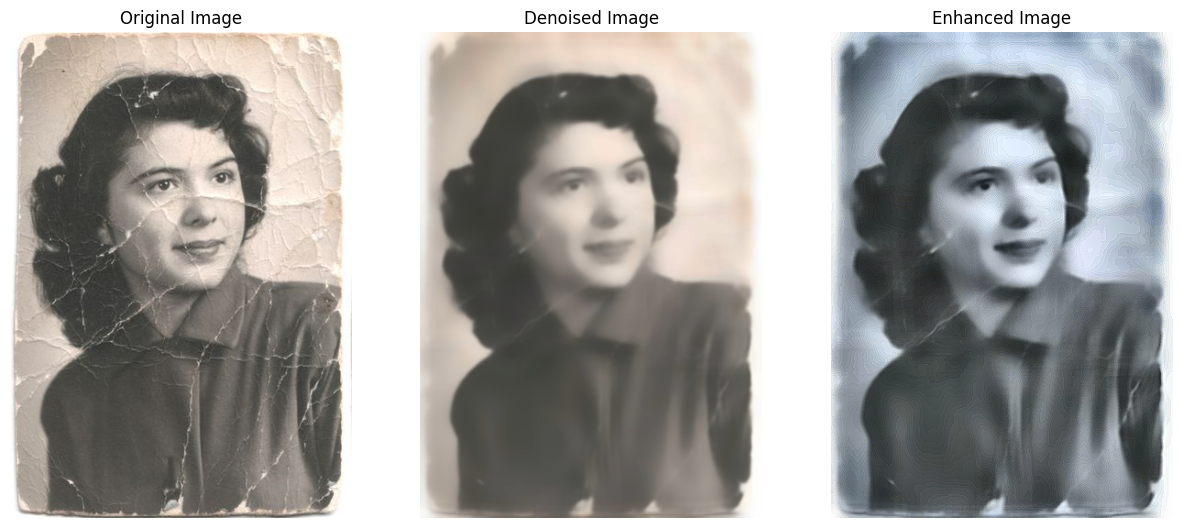

In [52]:
# Step 1: Display the results
plt.figure(figsize=(15, 10))

# Display the original image
plt.subplot(1, 3, 1)
img_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

# Display the denoised image
plt.subplot(1, 3, 2)
denoised_rgb = cv2.cvtColor(remove_noise(img1), cv2.COLOR_BGR2RGB)
plt.imshow(denoised_rgb)
plt.title('Denoised Image')
plt.axis('off')

# Enhanced image
enhanced_image = enhance_image(denoised_rgb)
plt.subplot(1, 3, 3)
plt.imshow(enhanced_rgb)
plt.title('Enhanced Image')
plt.axis('off')
plt.show()

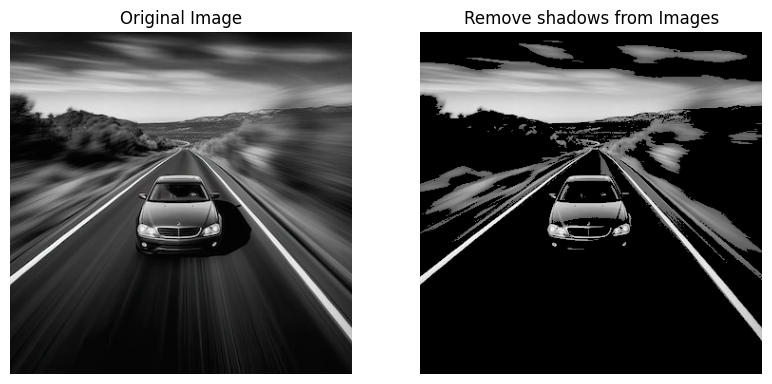

In [51]:
# Step 1: Display the results
plt.figure(figsize=(15, 10))

# Display the original image
plt.subplot(1, 3, 1)
img_rgb = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

# Display the denoised image
plt.subplot(1, 3, 2)
denoised_rgb = cv2.cvtColor(remove_noise(img4), cv2.COLOR_BGR2RGB)
shadow_rgb = cv2.cvtColor(remove_shadows(img4), cv2.COLOR_BGR2RGB)
plt.imshow(shadow_rgb)
plt.title('Remove shadows from Images')
plt.axis('off')
plt.show()
